<a href="https://colab.research.google.com/github/Nsimaar99/Kaggle-Project/blob/master/SONAR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
sonar_data = pd.read_csv('/content/drive/MyDrive/Sonar/sonar data.csv', header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
sonar_data.shape

(208, 61)

In [8]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [95]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [96]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [97]:
# Seperating features and targets
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [105]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [108]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model on the training data
log_reg_model.fit(X_train_scaled, Y_train)

LogisticRegression()

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.91      0.77      0.83        26

    accuracy                           0.81        42
   macro avg       0.80      0.82      0.81        42
weighted avg       0.83      0.81      0.81        42

Confusion Matrix:
[[14  2]
 [ 6 20]]


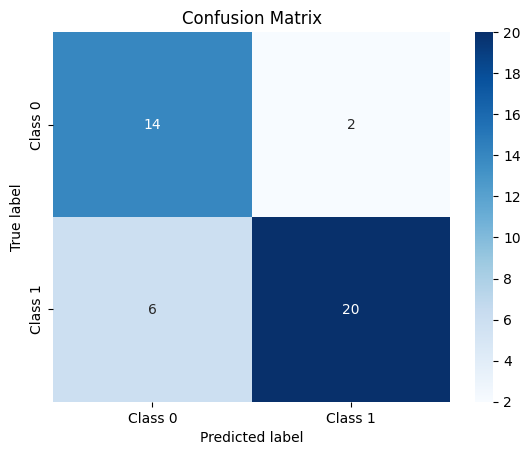

In [118]:
# Predict on the test data
Y_pred = log_reg_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Generate a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [120]:
def predict(input_data):
    """
    Predicts whether the input SONAR reading indicates a rock or a mine.

    Parameters:
    input_data (list or np.ndarray): The SONAR features for prediction.
                                      Should be a 1D array-like structure.

    Returns:
    str: Predicted class ('Rock' or 'Mine').
    """
    # Ensure input_data is in the correct format
    if not isinstance(input_data, (list, np.ndarray)):
        raise ValueError("Input data must be a list or numpy array.")

    input_data = np.array(input_data).reshape(1, -1)  # Reshape for a single sample

    # Scale the input data using the same scaler fitted on training data
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    prediction = log_reg_model.predict(input_data_scaled)

    # Map the prediction to class names
    return 'Rock' if prediction[0] == 0 else 'Mine'

# Example usage
if __name__ == "__main__":
    # Replace with actual SONAR features for prediction
    sample_input = [
        0.0272, 0.0378, 0.0488, 0.0848, 0.1127, 0.1103,
        0.1349, 0.2337, 0.3113, 0.3997, 0.3941, 0.3309,
        0.2926, 0.176, 0.1739, 0.2043, 0.2088, 0.2678,
        0.2434, 0.1839, 0.2802, 0.6172, 0.8015, 0.8313,
        0.844, 0.8494, 0.9168, 1, 0.7896, 0.5371,
        0.6472, 0.6505, 0.4959, 0.2175, 0.099, 0.0434,
        0.1708, 0.1979, 0.188, 0.1108, 0.1702, 0.0585,
        0.0638, 0.1391, 0.0638, 0.0581, 0.0641, 0.1044,
        0.0732, 0.0275, 0.0146, 0.0091, 0.0045, 0.0043,
        0.0043, 0.0098, 0.0054, 0.0051, 0.0065, 0.0103
    ]  # SONAR reading

    predicted_class = predict(sample_input)
    print(f"Predicted Class: {predicted_class}")


Predicted Class: Mine
